In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.optimize import minimize
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
crix = pd.read_excel("/Users/davidalexanderbehrens/Documents/PerformanceGraphExport.xls")

In [3]:
crix.head()

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,As of:,"Nov 28, 2022"
3,NaN,NaN
4,NaN,NaN


In [4]:
crix=crix.loc[6:1226]

In [5]:
crix.reset_index(drop=True, inplace=True)

In [6]:
crix["Date"] = crix["Unnamed: 0"]

In [7]:
crix["v"] = crix["Unnamed: 1"]

In [8]:
crix = crix[["Date", "v"]]

In [9]:
type(crix.Date[0])

datetime.datetime

In [10]:
crix.Date=crix.Date.astype(str)

In [11]:
for i in range(len(crix.Date)):
    crix.Date[i]=crix.Date[i].split()[0]

In [12]:
crix.tail(40)

,Date,v
1181,2022-09-26,1770.85
1182,2022-09-27,1756.01
1183,2022-09-28,1787.26
1184,2022-09-29,1780.7
1185,2022-09-30,1793.1
1186,2022-10-03,1785.78
1187,2022-10-04,1846.61
1188,2022-10-05,1839.11
1189,2022-10-06,1835.73
1190,2022-10-07,1792.12


In [13]:
month=[]
day=[]
year=[]
for i in range(len(crix.Date)):
    year.append(crix.Date[i].split("-")[0])
    month.append(crix.Date[i].split("-")[1])
    day.append(crix.Date[i].split("-")[2])

crix["Year"]=year    
crix["Month"]=month
crix["Day"]=day


In [14]:
rows=[]
beforeDates=[]
bigmon=["01", "03", "05", "07", "08", "10", "12"]
smallmon = ["04", "06", "09", "11"]
for i in range(len(crix.Month)-1):
    
    currentDay=int(crix.Day[i])
    currentv=crix.v[i]

    nextDay=int(crix.Day[i+1])
    currentv=crix.v[i]
    nextv=crix.v[i+1] 
    
    if crix.Month[i]==crix.Month[i+1]:
        
        while nextDay!=currentDay+1:
            
            y = crix.Year[i]
            m = crix.Month[i]
            
            if currentDay<9:
                d = "0"+str(currentDay+1)
                beforeDates.append(y+"-"+m+"-0"+str(currentDay))
            elif currentDay==9:
                d = str(currentDay+1)
                beforeDates.append(y+"-"+m+"-0"+str(currentDay))
            else:
                d = str(currentDay+1)
                beforeDates.append(y+"-"+m+"-"+str(currentDay))
            v = (currentv+nextv)/2
            date=y+"-"+m+"-"+d
            rows.append([date,v,y,m,d])
            
            currentv=v
            currentDay=int(d)
            
            if currentDay==int(crix.Day[i+1]):
                break
                
    else:
        if crix.Month[i] in bigmon:
            while currentDay<31 and nextDay!=currentDay+1:
                y = crix.Year[i]
                m = crix.Month[i]
                d = str(currentDay+1)    
                v = (currentv+nextv)/2
                date=y+"-"+m+"-"+d
                rows.append([date,v,y,m,d])
                beforeDates.append(y+"-"+m+"-"+str(currentDay))
                currentv=v
                currentDay=int(d)
                #if currentDay==31:
                #    break
        
            else:
                if currentDay==31 and crix.Day[i+1]!="01":       
                    y = crix.Year[i+1]
                    m = crix.Month[i+1]
                    d = "01"
                    date=y+"-"+m+"-"+d
                    v = (currentv+nextv)/2
                    rows.append([date,v,y,m,d])
                    beforeDates.append(crix.Year[i]+"-"+crix.Month[i]+"-"+str(currentDay))
                    currentDay = int(d)
                    while currentDay+1<int(crix.Day[i+1]):
                        
                        if currentDay<9:
                            d = "0"+str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-0"+str(currentDay))
                        elif currentDay==9:
                            d = str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-0"+str(currentDay))
                        else:
                            d = str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-"+str(currentDay))
                        v = (currentv+nextv)/2
                        date=y+"-"+m+"-"+d
                        rows.append([date,v,y,m,d])

                        currentv=v
                        currentDay=int(d)

                        if currentDay==int(crix.Day[i+1]):
                            break
                    
                    
        elif crix.Month[i] in smallmon:
            while currentDay<30 and nextDay!=currentDay+1:
                y = crix.Year[i]
                m = crix.Month[i]
                d = str(currentDay+1)    
                v = (currentv+nextv)/2
                date=y+"-"+m+"-"+d
                rows.append([date,v,y,m,d])
                beforeDates.append(y+"-"+m+"-"+str(currentDay))
                currentv=v
                currentDay=int(d)
                if currentDay==30:
                    break

        
            if currentDay==30 and crix.Day[i+1]!="01":       
                y = crix.Year[i+1]
                m = crix.Month[i+1]
                d = "01"
                date=y+"-"+m+"-"+d
                v = (currentv+nextv)/2
                rows.append([date,v,y,m,d])
                beforeDates.append(crix.Year[i]+"-"+crix.Month[i]+"-"+str(currentDay))
                currentDay = int(d)
                while currentDay+1<int(crix.Day[i+1]):
                        
                    if currentDay<9:
                        d = "0"+str(currentDay+1)
                        beforeDates.append(y+"-"+m+"-0"+str(currentDay))
                    elif currentDay==9:
                        d = str(currentDay+1)
                        beforeDates.append(y+"-"+m+"-0"+str(currentDay))
                    else:
                        d = str(currentDay+1)
                        beforeDates.append(y+"-"+m+"-"+str(currentDay))
                    v = (currentv+nextv)/2
                    date=y+"-"+m+"-"+d
                    rows.append([date,v,y,m,d])

                    currentv=v
                    currentDay=int(d)

                    if currentDay==int(crix.Day[i+1]):
                        break
            
        else:
            if int(crix.Year[i])%4==0:
                while currentDay<29 and nextDay!=currentDay+1:
                    y = crix.Year[i]
                    m = crix.Month[i]
                    d = str(currentDay+1)    
                    v = (currentv+nextv)/2
                    date=y+"-"+m+"-"+d
                    rows.append([date,v,y,m,d])
                    beforeDates.append(y+"-"+m+"-"+str(currentDay))
                    currentv=v
                    currentDay=int(d)
                    if currentDay == 29:
                        break

                if currentDay==29 and crix.Day[i+1]!="01":       
                    y = crix.Year[i+1]
                    m = crix.Month[i+1]
                    d = "01"
                    date=y+"-"+m+"-"+d
                    v = (currentv+nextv)/2
                    rows.append([date,v,y,m,d])
                    beforeDates.append(crix.Year[i]+"-"+crix.Month[i]+"-"+str(currentDay))
                    currentDay = int(d)
                    while currentDay+1<int(crix.Day[i+1]):

                        if currentDay<9:
                            d = "0"+str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-0"+str(currentDay))
                        elif currentDay==9:
                            d = str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-0"+str(currentDay))
                        else:
                            d = str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-"+str(currentDay))
                        v = (currentv+nextv)/2
                        date=y+"-"+m+"-"+d
                        rows.append([date,v,y,m,d])

                        currentv=v
                        currentDay=int(d)

                        if currentDay==int(crix.Day[i+1]):
                            break
                        
            else:
                while currentDay<28 and nextDay!=currentDay+1:
                    y = crix.Year[i]
                    m = crix.Month[i]
                    d = str(currentDay+1)    
                    v = (currentv+nextv)/2
                    date=y+"-"+m+"-"+d
                    rows.append([date,v,y,m,d])
                    beforeDates.append(y+"-"+m+"-"+str(currentDay))
                    currentv=v
                    currentDay=int(d)
                    if currentDay == 28:
                        break

                if currentDay==28 and crix.Day[i+1]!="01":       
                    y = crix.Year[i+1]
                    m = crix.Month[i+1]
                    d = "01"
                    date=y+"-"+m+"-"+d
                    v = (currentv+nextv)/2
                    rows.append([date,v,y,m,d])
                    beforeDates.append(crix.Year[i]+"-"+crix.Month[i]+"-"+str(currentDay))
                    currentDay = int(d)
                    while currentDay+1<int(crix.Day[i+1]):

                        if currentDay<9:
                            d = "0"+str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-0"+str(currentDay))
                        elif currentDay==9:
                            d = str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-0"+str(currentDay))
                        else:
                            d = str(currentDay+1)
                            beforeDates.append(y+"-"+m+"-"+str(currentDay))
                        v = (currentv+nextv)/2
                        date=y+"-"+m+"-"+d
                        rows.append([date,v,y,m,d])

                        currentv=v
                        currentDay=int(d)

                        if currentDay==int(crix.Day[i+1]):
                            break

In [15]:
c_crix = crix.copy()

In [16]:
for i in range(len(rows)):
    if i == 0:
        df_tmp = pd.DataFrame([c_crix.loc[c_crix[c_crix.Date==beforeDates[i]].index[0]]], columns=c_crix.columns)
        df_tmp2 = c_crix.loc[c_crix[c_crix.Date==beforeDates[i]].index[0]+1:]
        
    else:
        df_tmp = c_crix.loc[0:(c_crix[c_crix.Date==beforeDates[i]].index[0])]
        df_tmp2 = c_crix.loc[c_crix[c_crix.Date==beforeDates[i]].index[0]+1:]


    
    row_dict={"Date": [rows[i][0]], "v": [rows[i][1]], 
              "Year": [rows[i][2]], "Month": [rows[i][3]], "Day": [rows[i][4]]}
    dfr = pd.DataFrame(row_dict)
    df_tmp=pd.concat([df_tmp, dfr], ignore_index=True)
    
    #print(c_crix.loc[(c_crix[c_crix.Date==beforeDates[i]].index[0]+1)])
    c_crix=pd.concat([df_tmp, df_tmp2], ignore_index=True)
    #crix = pd.concat([df_tmp,crix.loc[(crix[crix.Date==beforeDates[i]].index[0]+1):]], ignore_index=True)
    #crix = crix.reset_index(drop=True, inplace=True)
    #columns=["Date", "v", "Year", "Month", "Day"])
    

In [17]:
c_crix

,Date,v,Year,Month,Day
0,2018-03-16,1000.0,2018,03,16
1,2018-03-17,974.48,2018,03,17
2,2018-03-18,961.72,2018,03,18
3,2018-03-19,948.96,2018,03,19
4,2018-03-20,1019.95,2018,03,20
...,...,...,...,...,...
1704,2022-11-14,1537.66,2022,11,14
1705,2022-11-15,1587.57,2022,11,15
1706,2022-11-16,1554.27,2022,11,16
1707,2022-11-17,1557.12,2022,11,17


In [18]:
crix=c_crix.loc[(c_crix[c_crix.Date=="2018-04-01"].index[0]):(c_crix[c_crix.Date=="2022-10-31"].index[0])]

In [19]:
crix

,Date,v,Year,Month,Day
16,2018-04-01,753.4675,2018,04,01
17,2018-04-02,756.79,2018,04,02
18,2018-04-03,812.9,2018,04,03
19,2018-04-04,747.36,2018,04,04
20,2018-04-05,737.85,2018,04,05
...,...,...,...,...,...
1686,2022-10-27,1932.63,2022,10,27
1687,2022-10-28,1934.69,2022,10,28
1688,2022-10-29,1934.375,2022,10,29
1689,2022-10-30,1934.2175,2022,10,30


In [20]:
btc = pd.read_csv("/Users/davidalexanderbehrens/Documents/BTC-USD.csv")

In [21]:
btc=btc.loc[(btc[btc.Date=="2018-04-01"].index[0]):(btc[btc.Date=="2022-10-31"].index[0])]

In [22]:
eth = pd.read_csv("/Users/davidalexanderbehrens/Documents/ETH-USD.csv")

In [23]:
eth=eth.loc[(eth[eth.Date=="2018-04-01"].index[0]):(eth[eth.Date=="2022-10-31"].index[0])]

In [24]:
bnb = pd.read_csv("/Users/davidalexanderbehrens/Documents/BNB-USD.csv")

In [25]:
bnb=bnb.loc[(bnb[bnb.Date=="2018-04-01"].index[0]):(bnb[bnb.Date=="2022-10-31"].index[0])]

In [26]:
xrp = pd.read_csv("/Users/davidalexanderbehrens/Documents/XRP-USD.csv")

In [27]:
xrp=xrp.loc[(xrp[xrp.Date=="2018-04-01"].index[0]):(xrp[xrp.Date=="2022-10-31"].index[0])]

In [28]:
ada = pd.read_csv("/Users/davidalexanderbehrens/Documents/ADA-USD.csv")

In [29]:
ada=ada.loc[(ada[ada.Date=="2018-04-01"].index[0]):(ada[ada.Date=="2022-10-31"].index[0])]

In [30]:
date =list(btc.Date)

In [31]:
df_tmp = pd.DataFrame(list(zip(date, btc.Close, eth.Close, bnb.Close, xrp.Close, ada.Close, crix.v)), columns=["Date", "BTC", "ETH",
                                                                                      "BNB", "XRP", "ADA",
                                                                                       "CRIX"])

In [32]:
df_tmp

,Date,BTC,ETH,BNB,XRP,ADA,CRIX
0,2018-04-01,6844.229980,379.606995,11.066200,0.485081,0.150768,753.4675
1,2018-04-02,7083.799805,386.424988,12.620700,0.500688,0.156385,756.7900
2,2018-04-03,7456.109863,416.893005,13.360700,0.558044,0.172447,812.9000
3,2018-04-04,6853.839844,380.542999,12.190400,0.501631,0.155356,747.3600
4,2018-04-05,6811.470215,383.231995,12.453600,0.495801,0.148758,737.8500
...,...,...,...,...,...,...,...
1670,2022-10-27,20285.835938,1514.374878,286.844116,0.462407,0.388697,1932.6300
1671,2022-10-28,20595.351563,1555.477905,298.014191,0.473981,0.404507,1934.6900
1672,2022-10-29,20818.476563,1619.698486,304.217957,0.470416,0.419778,1934.3750
1673,2022-10-30,20635.603516,1590.783325,313.754791,0.458455,0.406047,1934.2175


In [33]:
df_tmp["Date"] = df_tmp["Date"].astype("datetime64")
df_tmp = df_tmp.set_index("Date")

In [34]:
df_tmp.index.values

array(['2018-04-01T00:00:00.000000000', '2018-04-02T00:00:00.000000000',
       '2018-04-03T00:00:00.000000000', ...,
       '2022-10-29T00:00:00.000000000', '2022-10-30T00:00:00.000000000',
       '2022-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

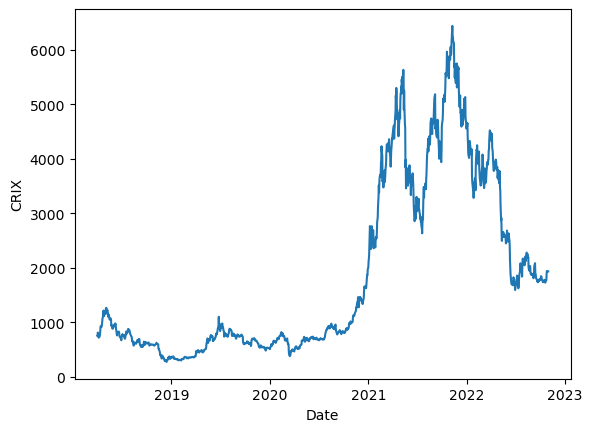

In [35]:
x = df_tmp.index.values
y = df_tmp.CRIX
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set(xlabel="Date", ylabel="CRIX")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.savefig('CRIX.png',  bbox_inches='tight')
plt.show()

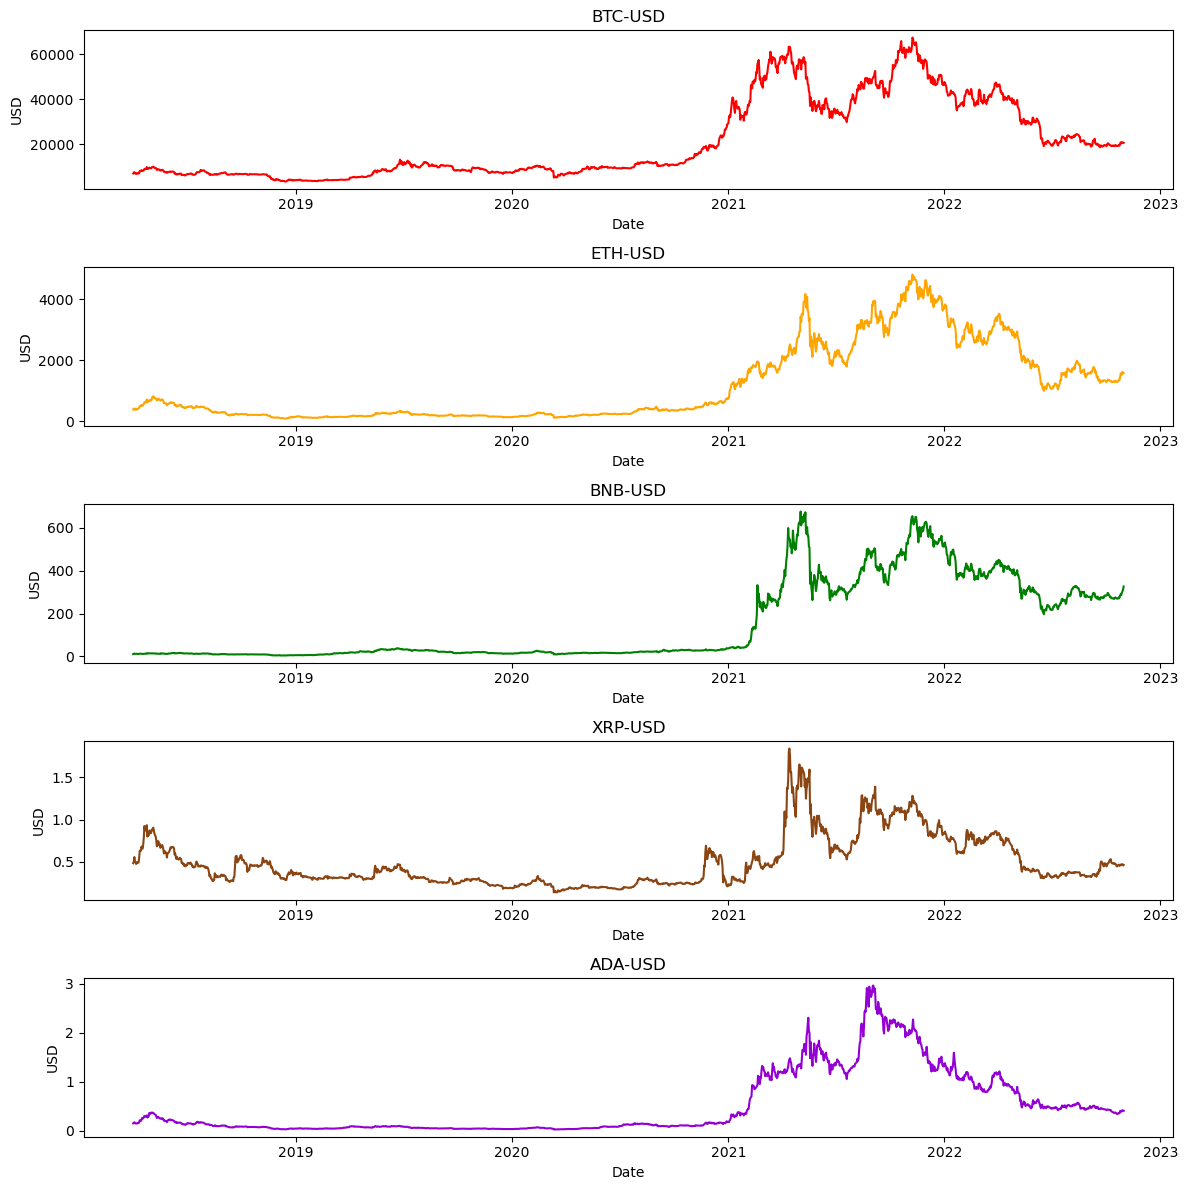

In [36]:
titles = ["BTC-USD", "ETH-USD", "BNB-USD", "XRP-USD", "ADA-USD"]
coins = ["BTC", "ETH", "BNB", "XRP", "ADA"]
colors = ["red", "orange", "green", "saddlebrown", "darkviolet"]
fig, axs = plt.subplots(5,1, figsize=(12,12))
for i in range(5):
    axs[i].plot(df_tmp.index.values,df_tmp[coins[i]], color=colors[i])
    axs[i].set(xlabel="Date", ylabel="USD", title=titles[i])
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
plt.tight_layout()
#plt.savefig("Coins.png")
plt.show()

In [37]:
crix.reset_index(drop=True, inplace=True)
crix_r = []
for i in range(len(crix.v)-1):
    crix_r.append((crix.v[i+1]/crix.v[i])-1)

In [38]:
btc.reset_index(drop=True, inplace=True)
btc_r = []
for i in range(len(btc.Close)-1):
    btc_r.append((btc.Close[i+1]/btc.Close[i])-1)

In [39]:
eth.reset_index(drop=True, inplace=True)
eth_r = []
for i in range(len(eth.Close)-1):
    eth_r.append((eth.Close[i+1]/eth.Close[i])-1)

In [40]:
bnb.reset_index(drop=True, inplace=True)
bnb_r = []
for i in range(len(bnb.Close)-1):
    bnb_r.append((bnb.Close[i+1]/bnb.Close[i])-1)

In [41]:
ada.reset_index(drop=True, inplace=True)
ada_r = []
for i in range(len(ada.Close)-1):
    ada_r.append((ada.Close[i+1]/ada.Close[i])-1)

In [42]:
xrp.reset_index(drop=True, inplace=True)
xrp_r = []
for i in range(len(xrp.Close)-1):
    xrp_r.append((xrp.Close[i+1]/xrp.Close[i])-1)

In [43]:
date=list(btc.Date[1:])
df = pd.DataFrame(list(zip(date, btc_r, eth_r, bnb_r, xrp_r, ada_r, crix_r)), columns=["Date", "BTC_r", "ETH_r",
                                                                                      "BNB_r", "XRP_r", "ADA_r",
                                                                                       "CRIX_r"])

In [44]:
df.reset_index(drop=True, inplace=True)

In [45]:
split_date = []
for i in df.Date:
    split_date.append(i.split("-"))

In [46]:
Year = []
Month = []
for i in split_date:
    Year.append(i[0])
    Month.append(i[1])

In [47]:
df["Year"]=Year
df["Month"]=Month

In [48]:
BTC_mr=[]
ETH_mr=[]
BNB_mr=[]
XRP_mr=[]
ADA_mr=[]
CRIX_mr=[]
tmp=[1+df.BTC_r[0], 1+df.ETH_r[0], 1+df.BNB_r[0], 1+df.XRP_r[0],
    1+df.ADA_r[0], 1+df.CRIX_r[0]]
mr=[]
for i in range(1,len(df.Date)):
    if df.Month[i]==df.Month[i-1]:
        for j in range(len(tmp)):
            tmp[j]=tmp[j]*(1+df.iloc[i,j+1])
          
    elif df.Month[i]!=df.Month[i-1]:
        mr.append([x-1 for x in tmp])
        tmp=[1+df.BTC_r[i], 1+df.ETH_r[i], 1+df.BNB_r[i], 1+df.XRP_r[i],
             1+df.ADA_r[i], 1+df.CRIX_r[i]]
        
    if i==len(df.Date)-1:
        mr.append([x-1 for x in tmp])

In [49]:
df = pd.DataFrame(mr, columns=["BTC_mr", "ETH_mr", "BNB_mr", "XRP_mr", "ADA_mr", "CRIX_mr"])

In [50]:
df

,BTC_mr,ETH_mr,BNB_mr,XRP_mr,ADA_mr,CRIX_mr
0,0.350123,0.764783,0.293317,0.727419,1.277128,0.583771
1,-0.188991,-0.137745,-0.008517,-0.268893,-0.344008,-0.212709
2,-0.145469,-0.212007,0.032917,-0.238935,-0.388710,-0.229875
3,0.214934,-0.046823,-0.060168,-0.066532,0.040866,0.118980
4,-0.095478,-0.347717,-0.200473,-0.229520,-0.286824,-0.175480
5,-0.058546,-0.177227,-0.090432,0.734317,-0.166357,-0.058858
6,-0.046479,-0.152318,-0.065168,-0.229017,-0.181818,-0.076450
7,-0.364116,-0.426635,-0.457705,-0.191638,-0.441704,-0.382889
8,-0.068347,0.178462,0.213871,-0.026897,0.055170,-0.040496
9,-0.076124,-0.197253,0.016822,-0.120979,-0.065485,-0.097829


In [51]:
df_ir=pd.read_csv("/Users/davidalexanderbehrens/Documents/interest_rate_us.csv")

In [52]:
df_ir=df_ir[["TIME", "Value"]]

In [53]:
df_ir1 =df_ir.loc[0:24]
df_ir2=df_ir.loc[25:]

apr2020=pd.DataFrame([["2020-04", (df_ir.Value[24]+df_ir.Value[25])/2]], columns=["TIME", "Value"])
df_ir = pd.concat([df_ir1, apr2020, df_ir2], ignore_index=True)

In [54]:
df_ir

,TIME,Value
0,2018-03,2.08
1,2018-04,2.20
2,2018-05,2.16
3,2018-06,2.19
4,2018-07,2.17
5,2018-08,2.19
6,2018-09,2.24
7,2018-10,2.37
8,2018-11,2.56
9,2018-12,2.69


In [55]:
df_ir=df_ir.loc[(df_ir[df_ir.TIME=="2018-04"].index[0]):(df_ir[df_ir.TIME=="2022-10"].index[0])]
df_ir.reset_index(drop=True, inplace=True)
df_ir["Month"]=df_ir["TIME"]
df_ir["Rf"]=df_ir["Value"]
df_ir["Rf"]=((df_ir["Rf"]/100)+1)**(1/12)-1
df[["Rf", "Month"]]=df_ir[["Rf", "Month"]]

In [56]:
df["ER"]=df["CRIX_mr"]-df["Rf"]

In [57]:
df

,BTC_mr,ETH_mr,BNB_mr,XRP_mr,ADA_mr,CRIX_mr,Rf,Month,ER
0,0.350123,0.764783,0.293317,0.727419,1.277128,0.583771,0.001815,2018-04,0.581956
1,-0.188991,-0.137745,-0.008517,-0.268893,-0.344008,-0.212709,0.001782,2018-05,-0.214492
2,-0.145469,-0.212007,0.032917,-0.238935,-0.388710,-0.229875,0.001807,2018-06,-0.231682
3,0.214934,-0.046823,-0.060168,-0.066532,0.040866,0.118980,0.001791,2018-07,0.117189
4,-0.095478,-0.347717,-0.200473,-0.229520,-0.286824,-0.175480,0.001807,2018-08,-0.177286
5,-0.058546,-0.177227,-0.090432,0.734317,-0.166357,-0.058858,0.001848,2018-09,-0.060706
6,-0.046479,-0.152318,-0.065168,-0.229017,-0.181818,-0.076450,0.001954,2018-10,-0.078404
7,-0.364116,-0.426635,-0.457705,-0.191638,-0.441704,-0.382889,0.002109,2018-11,-0.384998
8,-0.068347,0.178462,0.213871,-0.026897,0.055170,-0.040496,0.002214,2018-12,-0.042711
9,-0.076124,-0.197253,0.016822,-0.120979,-0.065485,-0.097829,0.002133,2019-01,-0.099962


In [58]:
df_tmp = df

In [59]:
df.to_csv("/Users/davidalexanderbehrens/Documents/mrgraphicdata.csv")

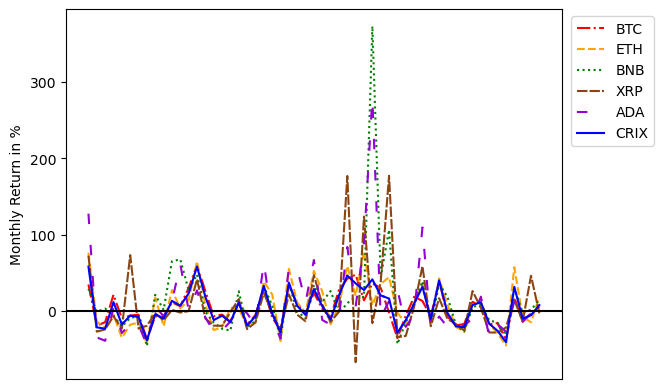

In [60]:
cols = ["BTC_mr", "ETH_mr", "BNB_mr", "XRP_mr", "ADA_mr", "CRIX_mr"]
labels = ["BTC", "ETH", "BNB", "XRP", "ADA", "CRIX"]
colors = ["red", "orange", "green", "saddlebrown", "darkviolet", "blue"]
linestyles = ["dashdot", "dashed", "dotted", (0, (5,1)), (0,(5,10)), "solid"]
fig= plt.figure()    


for i in range(6):
    
    plt.plot(df_tmp[cols[i]]*100, color=colors[i], linestyle=linestyles[i], label=labels[i])
plt.tick_params(bottom=False,labelbottom=False)
plt.ylabel("Monthly Return in %")
plt.axhline(y=0, color="black", linestyle="solid")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
#plt.savefig("monthly_r.png", bbox_inches="tight")
plt.show()

In [61]:
def first_fun(beta):
    mom_cons1 = []
    mom_cons2 = []
    for i in range(5):
        mom_cons1.append(len(df.CRIX_mr)**(-1)*np.sum(df.iloc[:,i]-df.Rf-beta[i]*df.ER))
        mom_cons2.append(len(df.CRIX_mr)**(-1)*np.sum(df.ER*(df.iloc[:,i]-df.Rf-beta[i]*df.ER)))
    
    mom_cons1.extend(mom_cons2)
    
    return len(df.CRIX_mr)*np.dot(np.array(mom_cons1),np.array(mom_cons1))

In [62]:
beta_1=minimize(first_fun, np.array([np.cov(df.BTC_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.ETH_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.BNB_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.XRP_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.ADA_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER)]))

In [63]:
beta_1=beta_1.x

In [64]:
beta_1

array([0.91915287, 1.29382759, 1.97628295, 1.25641898, 1.74976935])

In [65]:
u=[]
for i in range(5):
   u.append(list(df.iloc[:,i]-df.Rf-beta_1[i]*df.ER))

In [66]:
u=np.transpose(np.array(u))

In [67]:
df_error = pd.DataFrame(u, columns=["u_btc", "u_eth", "u_bnb", "u_xrp", "u_ada"])

In [68]:
ER_u =[]
for i in df_error.columns:
    ER_u.append(df_error[i]*df.ER)

ER_u=np.transpose(np.array(ER_u))

df_tmp=pd.DataFrame(ER_u, columns=["ER_u_btc", "ER_u_eth", "ER_u_bnb", "ER_u_xrp","ER_u_ada"])   

In [69]:
df_error=pd.concat([df_error,df_tmp], axis=1)

In [70]:
df_error

,u_btc,u_eth,u_bnb,u_xrp,u_ada,ER_u_btc,ER_u_eth,ER_u_bnb,ER_u_xrp,ER_u_ada
0,-0.186599,0.010017,-0.858608,-0.005577,0.257024,-0.108592,0.005830,-0.499672,-0.003245,0.149577
1,0.006377,0.137987,0.413596,-0.001185,0.029521,-0.001368,-0.029597,-0.088713,0.000254,-0.006332
2,0.065675,0.085942,0.488979,0.050347,0.014872,-0.015216,-0.019911,-0.113287,-0.011664,-0.003446
3,0.105429,-0.200237,-0.293558,-0.215561,-0.165979,0.012355,-0.023466,-0.034402,-0.025261,-0.019451
4,0.065669,-0.120146,0.148088,-0.008581,0.021580,-0.011642,0.021300,-0.026254,0.001521,-0.003826
5,-0.004596,-0.100532,0.027692,0.808741,-0.061984,0.000279,0.006103,-0.001681,-0.049095,0.003763
6,0.023633,-0.052830,0.087827,-0.132462,-0.046583,-0.001853,0.004142,-0.006886,0.010386,0.003652
7,-0.012352,0.069378,0.301051,0.289972,0.229845,0.004756,-0.026710,-0.115904,-0.111639,-0.088490
8,-0.031304,0.231508,0.296065,0.024551,0.127689,0.001337,-0.009888,-0.012645,-0.001049,-0.005454
9,0.013623,-0.070053,0.212242,0.002482,0.107292,-0.001362,0.007003,-0.021216,-0.000248,-0.010725


In [71]:
w_matrix=[]
for i in range(len(df_error.columns)):
    tmp = []
    for j in range(len(df_error.columns)):
        tmp.append(sum(df_error.iloc[:,i]*df_error.iloc[:,j]))
    w_matrix.append(tmp)

In [72]:
w_matrix=len(df.CRIX_mr)*np.linalg.inv(np.array(w_matrix))

In [73]:
def second_fun(beta):
    mom_cons1 = []
    mom_cons2 = []
    for i in range(5):
        mom_cons1.append(len(df.CRIX_mr)**(-1)*np.sum(df.iloc[:,i]-df.Rf-beta[i]*df.ER))
        mom_cons2.append(len(df.CRIX_mr)**(-1)*np.sum(df.ER*(df.iloc[:,i]-df.Rf-beta[i]*df.ER)))
    
    mom_cons1.extend(mom_cons2)
    mom_cons=np.array(mom_cons1)
    
    return len(df.CRIX_mr)*np.dot(np.matmul(mom_cons, w_matrix),mom_cons)

In [74]:
beta_2=minimize(second_fun, np.array([np.cov(df.BTC_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.ETH_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.BNB_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.XRP_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.ADA_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER)]))

In [75]:
beta_2=beta_2.x

In [76]:
beta_2

array([0.86656785, 1.17273898, 1.07048282, 1.0378127 , 1.43286835])

In [77]:
J=second_fun(beta_2)

In [78]:
J

5.088747591017173

In [79]:
1-stats.chi2.cdf(J,5)

0.4051456856672322

In [80]:
capData = pd.read_csv("/Users/davidalexanderbehrens/Documents/coinmarketcap.csv")

In [81]:
capData.name.unique()

array(['Bitcoin', 'XRP', 'Ethereum', 'BNB', 'Cardano'], dtype=object)

In [82]:
for i in range(len(capData.timestamp)):
    capData.timestamp[i]=capData.timestamp[i].split(" ")[0]

In [83]:
split_date = []
for i in capData.timestamp:
    split_date.append(i.split("-"))

In [84]:
Year = []
Month = []
for i in split_date:
    Year.append(i[0])
    Month.append(i[1])

In [85]:
capData["Year"] = Year
capData["Month"] = Month

In [86]:
capData = capData[["timestamp","name", "market_cap", "Month", "Year"]]

In [87]:
bcap = capData[capData.name=="Bitcoin"]
ecap = capData[capData.name=="Ethereum"]
bincap = capData[capData.name=="BNB"]
xcap = capData[capData.name=="XRP"]
acap = capData[capData.name=="Cardano"]

In [88]:
dflist=[bcap, ecap, bincap, xcap, acap]

In [89]:
for i in dflist:
    i.reset_index(drop=True, inplace=True)

In [90]:
capis=[]
for i in dflist:
    capis.append(i.market_cap)

capis.append(bcap.Month)
capis.append(bcap.Year)
dfcaps=pd.concat(capis, axis=1)

In [91]:
dfcaps.columns = ["bcap", "ecap", "bincap", "xcap", "acap", "Month", "Year"]

In [92]:
dfcaps

,bcap,ecap,bincap,xcap,acap,Month,Year
0,1.160268e+11,3.741341e+10,1.286574e+09,1.896401e+10,3.908973e+09,04,2018
1,1.201019e+11,3.809328e+10,1.467303e+09,1.957416e+10,4.054605e+09,04,2018
2,1.264292e+11,4.110528e+10,1.553336e+09,2.181646e+10,4.471046e+09,04,2018
3,1.162296e+11,3.752893e+10,1.417275e+09,1.961102e+10,4.027926e+09,04,2018
4,1.155244e+11,3.780201e+10,1.447876e+09,1.938310e+10,3.856859e+09,04,2018
...,...,...,...,...,...,...,...
1669,3.985889e+11,1.917068e+11,4.645440e+10,2.350888e+10,1.384577e+10,10,2022
1670,3.893065e+11,1.853199e+11,4.588913e+10,2.315982e+10,1.333933e+10,10,2022
1671,3.952668e+11,1.903498e+11,4.767604e+10,2.373954e+10,1.388188e+10,10,2022
1672,3.995680e+11,1.982088e+11,4.866844e+10,2.356098e+10,1.440598e+10,10,2022


In [93]:
bcap_m=[]
ecap_m=[]
bincap=[]
xcap_m=[]
acap_m=[]
tmp=[dfcaps.bcap[0], dfcaps.ecap[0], dfcaps.bincap[0], dfcaps.xcap[0],
    dfcaps.acap[0]]
m_cap=[]
counter=0
for i in range(1,len(dfcaps.Month)):
    if dfcaps.Month[i]==dfcaps.Month[i-1]:
        counter=counter+1
        for j in range(len(tmp)):
            tmp[j]=tmp[j]+dfcaps.iloc[i,j]
    elif dfcaps.Month[i]!=dfcaps.Month[i-1]:
        m_cap.append([x/counter for x in tmp])
        tmp=[dfcaps.bcap[i], dfcaps.ecap[i], dfcaps.bincap[i], dfcaps.xcap[i],
            dfcaps.acap[i]]
        counter=0
    if i==len(dfcaps.Month)-1:
        m_cap.append([x/counter for x in tmp])

In [94]:
ranking=[]
m_rank=[]
for i in range(len(m_cap)):
    ranking=[0,0,0,0,0]
    tmp=m_cap[i]
    for j in range(len(m_cap[i])):
        inx=tmp.index(max(tmp))
        ranking[inx]=5-j
        tmp[inx]=0
    m_rank.append(ranking)

In [95]:
rank=pd.DataFrame(m_rank, columns=["B_capr", "E_capr", "BIN_capr", "X_capr", "A_capr"])

In [96]:
sizes=[]
for i in range(len(rank.B_capr)):
    s = ["M", "M", "M", "M", "M"]
    for j in range(len(rank.columns)):
        if rank.iloc[i,j]==5 or rank.iloc[i,j]==4:
            s[j]="B"
        elif rank.iloc[i,j]==1 or rank.iloc[i,j]==2:
            s[j]="S"
    sizes.append(s)

In [97]:
rank=pd.DataFrame(sizes, columns=["btc_size", "eth_size", "bnb_size", "xrp_size", "ada_size"])

In [98]:
rank.iloc[0,0]="BL"
rank.iloc[0,1]="BW"
rank.iloc[0,2]="SL"
rank.iloc[0,4]="SW"



In [99]:
rank

,btc_size,eth_size,bnb_size,xrp_size,ada_size
0,BL,BW,SL,M,SW
1,B,B,S,M,S
2,B,B,S,M,S
3,B,B,S,M,S
4,B,B,S,M,S
5,B,B,S,M,S
6,B,B,S,M,S
7,B,M,S,B,S
8,B,M,S,B,S
9,B,M,S,B,S


In [100]:
momentum=[]
cols = [x for x in df.columns[0:5]]
rcols = [x for x in rank.columns[0:5]]
for i in range(len(df.Rf)-1):
    big=[]
    small=[]
    for j in range(len(cols)):
        
        if rank.loc[i+1,rcols[j]]=="B":
            big.append(j)

        elif rank.loc[i+1,rcols[j]]=="S":
            small.append(j)
  
    if df.iloc[i,big[0]]>df.iloc[i,big[1]]:
        rank.iloc[i+1,big[0]]="BW"
        rank.iloc[i+1,big[1]]="BL"
    elif df.iloc[i,big[0]]<df.iloc[i,big[1]]:
        rank.iloc[i+1,big[1]]="BW"
        rank.iloc[i+1,big[0]]="BL"
        
    if df.iloc[i,small[0]]>df.iloc[i,small[1]]:
        rank.iloc[i+1,small[0]]="SW"
        rank.iloc[i+1,small[1]]="SL"
    elif df.iloc[i,small[0]]<df.iloc[i,small[1]]:
        rank.iloc[i+1,small[1]]="SW"
        rank.iloc[i+1,small[0]]="SL"
        

In [101]:
rank

,btc_size,eth_size,bnb_size,xrp_size,ada_size
0,BL,BW,SL,M,SW
1,BL,BW,SL,M,SW
2,BL,BW,SW,M,SL
3,BW,BL,SW,M,SL
4,BW,BL,SL,M,SW
5,BW,BL,SW,M,SL
6,BW,BL,SW,M,SL
7,BW,M,SW,BL,SL
8,BL,M,SL,BW,SW
9,BL,M,SW,BW,SL


In [102]:
momentum=[]
for i in range(len(rank.btc_size)):
    winners =[]
    losers = []
    for j in range(len(rcols)):
        if rank.iloc[i,j]=="BW" or rank.iloc[i,j]=="SW":
            winners.append(df.iloc[i,j])
        elif rank.iloc[i,j]=="BL" or rank.iloc[i,j]=="SL":
            losers.append(df.iloc[i,j])
    
    mom = 2**(-1)*(sum(winners)-sum(losers))
    momentum.append(mom)

In [103]:
df["Momentum"]=momentum

In [104]:
def first_fun2(beta1):
    mom_cons1 = []
    mom_cons2 = []
    mom_cons3 = []
    for i in range(5):
        mom_cons1.append(len(df.CRIX_mr)**(-1)*np.sum(df.iloc[:,i]-df.Rf-beta1[i]*df.ER-beta1[i+5]*df.Momentum))
        mom_cons2.append(len(df.CRIX_mr)**(-1)*np.sum(df.ER*(df.iloc[:,i]-df.Rf-beta1[i]*df.ER-beta1[i+5]*df.Momentum)))
        mom_cons3.append(len(df.CRIX_mr)**(-1)*np.sum(df.Momentum*(df.iloc[:,i]-df.Rf-beta1[i]*df.ER-beta1[i+5]*df.Momentum)))
    mom_cons1.extend(mom_cons2)
    mom_cons1.extend(mom_cons3)
    
    return len(df.CRIX_mr)*np.dot(np.array(mom_cons1),np.array(mom_cons1))

In [105]:
beta_12=minimize(first_fun2, np.array([np.cov(df.BTC_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.ETH_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.BNB_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.XRP_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.ADA_mr-df.Rf, df.ER, ddof=1)[0][1]/np.var(df.ER),
                                     np.cov(df.BTC_mr-df.Rf, df.Momentum, ddof=1)[0][1]/np.var(df.Momentum),
                                     np.cov(df.ETH_mr-df.Rf, df.Momentum, ddof=1)[0][1]/np.var(df.Momentum),
                                     np.cov(df.BNB_mr-df.Rf, df.Momentum, ddof=1)[0][1]/np.var(df.Momentum),
                                     np.cov(df.XRP_mr-df.Rf, df.Momentum, ddof=1)[0][1]/np.var(df.Momentum),
                                     np.cov(df.ADA_mr-df.Rf, df.Momentum, ddof=1)[0][1]/np.var(df.Momentum)]))

In [106]:
beta1=beta_12.x[0:5]
beta2=beta_12.x[5:]

In [107]:
print(beta1)
print(beta2)

[0.91069726 1.32903917 1.64285267 1.33628837 1.46553449]
[-0.0177861   0.09819705 -0.75529665  0.21192783 -0.66674705]


In [108]:
u=[]
for i in range(5):
   u.append(list(df.iloc[:,i]-df.Rf-beta1[i]*df.ER-beta2[i]*df.Momentum))

u=np.transpose(np.array(u))
df_error2 = pd.DataFrame(u, columns=["u_btc", "u_eth", "u_bnb", "u_xrp", "u_ada"])


In [109]:
df_error2

,u_btc,u_eth,u_bnb,u_xrp,u_ada
0,-0.169241,-0.079137,-0.136436,-0.200245,0.888650
1,0.002036,0.159496,0.234734,0.046066,-0.126205
2,0.066874,0.076665,0.545828,0.031225,0.067398
3,0.107849,-0.212254,-0.193786,-0.241952,-0.079089
4,0.065645,-0.122048,0.151623,-0.012000,0.026492
5,-0.003378,-0.107950,0.080943,0.792968,-0.014362
6,0.024948,-0.060994,0.145708,-0.149776,0.005304
7,-0.017284,0.092188,0.101503,0.340694,0.057581
8,-0.032708,0.238769,0.237544,0.040386,0.076461
9,0.013111,-0.068372,0.193055,0.006497,0.091365


In [110]:
ER_u =[]
for i in df_error2.columns:
    ER_u.append(df_error2[i]*df.ER)

ER_u=np.transpose(np.array(ER_u))

df_tmp=pd.DataFrame(ER_u, columns=["ER_u_btc", "ER_u_eth", "ER_u_bnb", "ER_u_xrp","ER_u_ada"])   



In [111]:
Mom_u=[]
for i in df_error2.columns:
    Mom_u.append(df_error2[i]*df.Momentum)
    
Mom_u=np.transpose(np.array(Mom_u))

df_tmp2 = pd.DataFrame(Mom_u, columns=["Mom_u_btc", "Mom_u_eth", "Mom_u_bnb", "Mom_u_xrp","Mom_u_ada"])

df_error2=pd.concat([df_error2,df_tmp, df_tmp2], axis=1)

In [112]:
df_error2

,u_btc,u_eth,u_bnb,u_xrp,u_ada,ER_u_btc,ER_u_eth,ER_u_bnb,ER_u_xrp,ER_u_ada,Mom_u_btc,Mom_u_eth,Mom_u_bnb,Mom_u_xrp,Mom_u_ada
0,-0.169241,-0.079137,-0.136436,-0.200245,0.888650,-0.098491,-0.046054,-0.079400,-0.116534,0.517155,-0.118340,-0.055336,-0.095401,-0.140018,0.621376
1,0.002036,0.159496,0.234734,0.046066,-0.126205,-0.000437,-0.034210,-0.050348,-0.009881,0.027070,-0.000289,-0.022668,-0.033361,-0.006547,0.017937
2,0.066874,0.076665,0.545828,0.031225,0.067398,-0.015493,-0.017762,-0.126458,-0.007234,-0.015615,0.011873,0.013612,0.096909,0.005544,0.011966
3,0.107849,-0.212254,-0.193786,-0.241952,-0.079089,0.012639,-0.024874,-0.022710,-0.028354,-0.009268,0.008667,-0.017057,-0.015573,-0.019444,-0.006356
4,0.065645,-0.122048,0.151623,-0.012000,0.026492,-0.011638,0.021638,-0.026881,0.002127,-0.004697,0.005445,-0.010123,0.012576,-0.000995,0.002197
5,-0.003378,-0.107950,0.080943,0.792968,-0.014362,0.000205,0.006553,-0.004914,-0.048138,0.000872,-0.000329,-0.010504,0.007876,0.077158,-0.001397
6,0.024948,-0.060994,0.145708,-0.149776,0.005304,-0.001956,0.004782,-0.011424,0.011743,-0.000416,0.002775,-0.006785,0.016209,-0.016662,0.000590
7,-0.017284,0.092188,0.101503,0.340694,0.057581,0.006654,-0.035492,-0.039078,-0.131166,-0.022169,0.001629,-0.008688,-0.009566,-0.032107,-0.005426
8,-0.032708,0.238769,0.237544,0.040386,0.076461,0.001397,-0.010198,-0.010146,-0.001725,-0.003266,0.001918,-0.013998,-0.013926,-0.002368,-0.004483
9,0.013111,-0.068372,0.193055,0.006497,0.091365,-0.001311,0.006835,-0.019298,-0.000649,-0.009133,0.000246,-0.001280,0.003615,0.000122,0.001711


In [113]:
w_matrix=[]
for i in range(len(df_error2.columns)):
    tmp = []
    for j in range(len(df_error2.columns)):
        tmp.append(sum(df_error2.iloc[:,i]*df_error2.iloc[:,j]))
    w_matrix.append(tmp)
    
w_matrix=len(df.CRIX_mr)*np.linalg.inv(np.array(w_matrix))

In [114]:
def second_fun2(beta):
    mom_cons1 = []
    mom_cons2 = []
    mom_cons3 = []
    for i in range(5):
        mom_cons1.append(len(df.CRIX_mr)**(-1)*np.sum(df.iloc[:,i]-df.Rf-beta[i]*df.ER-beta[i+5]*df.Momentum))
        mom_cons2.append(len(df.CRIX_mr)**(-1)*np.sum(df.ER*(df.iloc[:,i]-df.Rf-beta[i]*df.ER-beta[i+5]*df.Momentum)))
        mom_cons3.append(len(df.CRIX_mr)**(-1)*np.sum(df.Momentum*(df.iloc[:,i]-df.Rf-beta[i]*df.ER-beta[i+5]*df.Momentum)))
    mom_cons1.extend(mom_cons2)
    mom_cons1.extend(mom_cons3)
    
    return len(df.CRIX_mr)*np.dot(np.matmul(mom_cons1, w_matrix),mom_cons1)

In [115]:
beta_22 = minimize(second_fun2, beta_12.x)

In [116]:
beta_22.x

array([ 0.86432972,  1.168426  ,  1.03083767,  1.01747863,  1.40121257,
       -0.01194065,  0.09781768, -0.89539386,  0.10368545, -0.67733065])

In [117]:
beta_22=[x for x in beta_22.x]

In [118]:
J = second_fun2(beta_22)

In [119]:
J

4.791645470219019

In [120]:
1-stats.chi2.cdf(J,5)

0.44183370038448655